In [144]:
!pip install openml

In [145]:
#importing

import numpy as np
import openml
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import sklearn
from collections import Counter


### Task 1: Load and Data Analysis [2 Marks]
1. *Load the Boston Housing dataset from OpenML (ID=531)*.
2. Data Profiling:
  - Correlation HeatMap
  - Pairplot of Selected Features
  - Feature vs. Target (Scatter Plots)
  - Distribution of Target (MEDV)



In [146]:
data = fetch_openml(data_id=531, as_frame=True)


In [147]:
data = data.frame

In [148]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [149]:
#dropping a few columns
data = data.drop(['CHAS','RAD','ZN'],axis = 1)

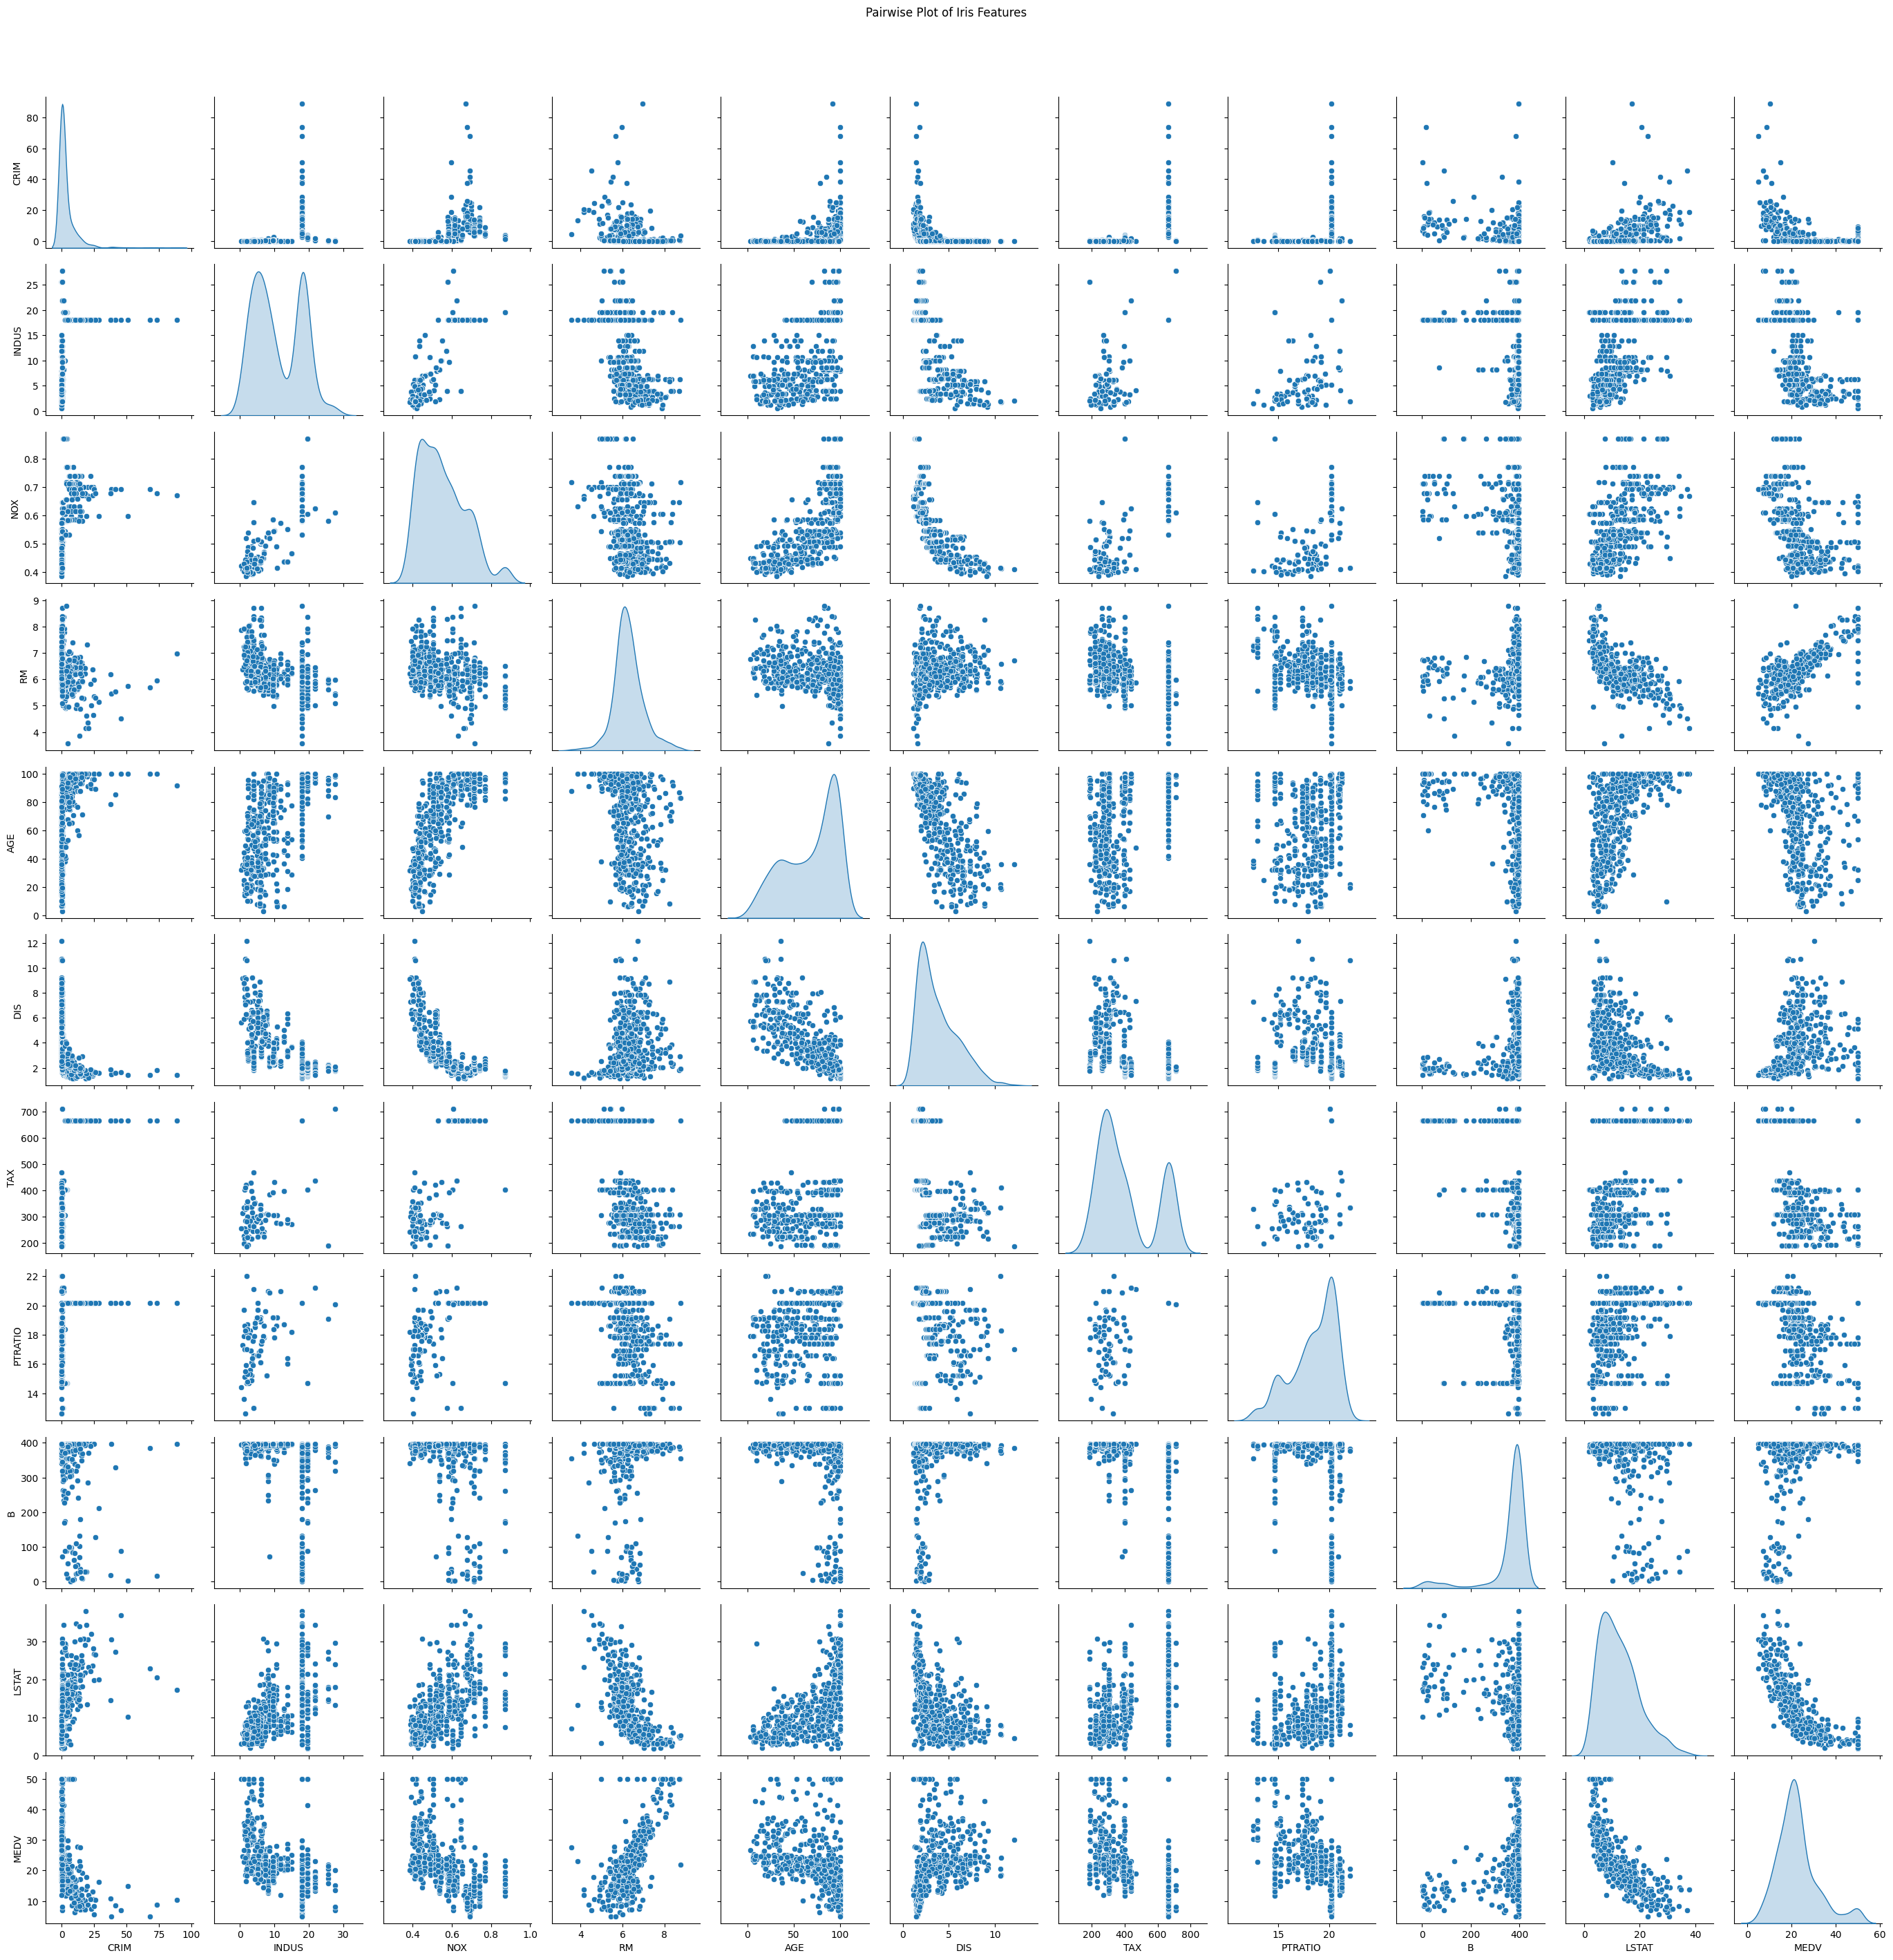

In [150]:
#pair plot
pairplot = sns.pairplot(
    data,
    diag_kind="kde",
    corner=False,
    height=2.5
)
pairplot.fig.suptitle("Pairwise Plot of Iris Features", y=1.03)
plt.tight_layout()
plt.show()

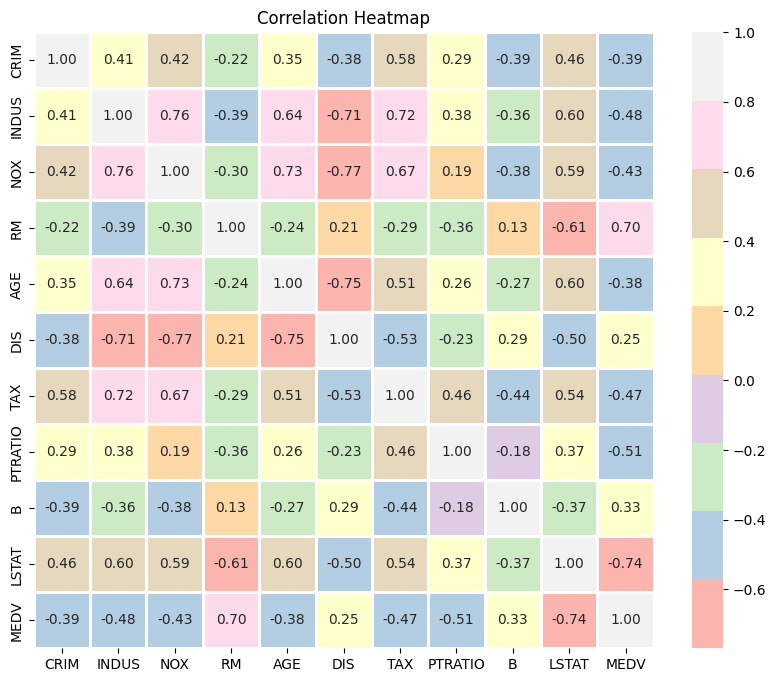

In [151]:
# correlation heatmap
plt.figure(figsize = (10,8))
sns.heatmap(data.corr(),annot = True,cmap  = 'Pastel1', fmt = '.2f', linewidths = 1)
plt.title("Correlation Heatmap")
plt.show()

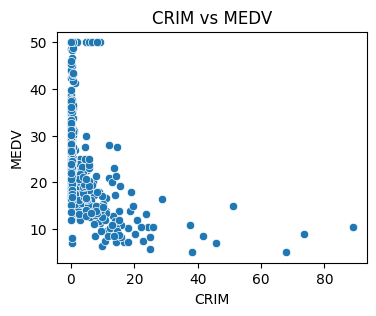

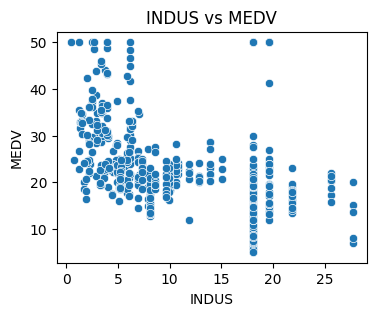

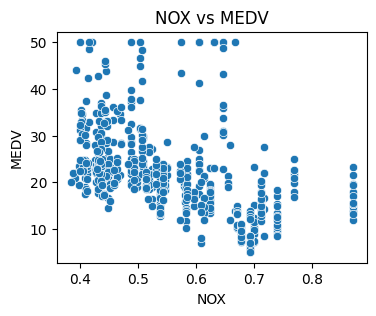

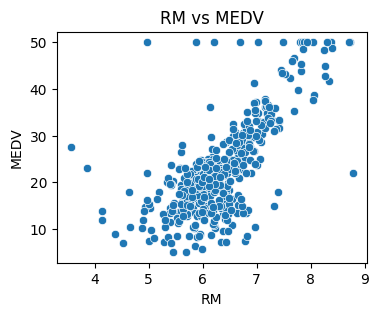

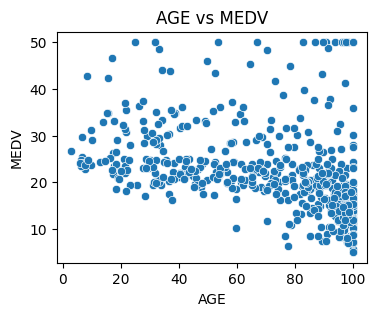

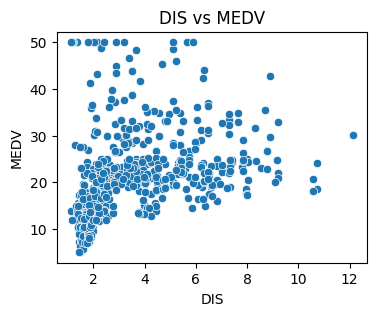

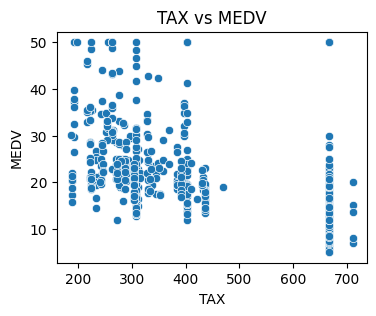

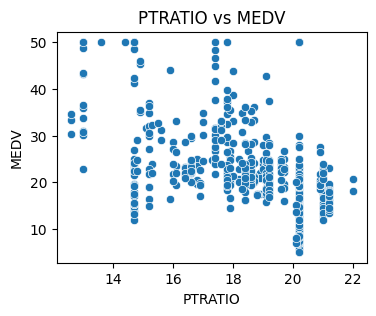

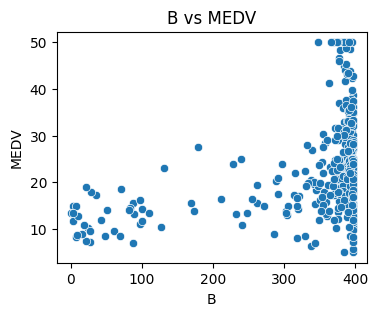

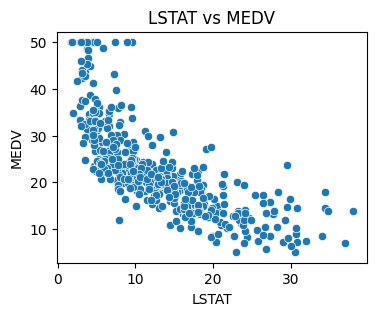

In [152]:
#Feature vs target scatterplot
features = ['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT']
target = 'MEDV'

# now side by side plotting
for feature in features:
  plt.figure(figsize = (4,3))
  sns.scatterplot(data = data,x = feature, y = target)
  plt.title(f"{feature} vs {target}")
  plt.show()

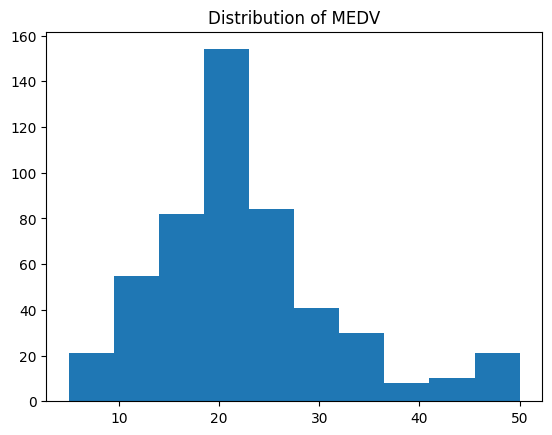

In [153]:
# Plotting the Distribution of MEDV
plt.hist(data['MEDV'])
plt.title("Distribution of MEDV")
plt.show()

### Task 2: Scaling and Splitting the data [1 Marks]
1. Scale the features so that all are in the same range (e.g., using Min-Max scaling).
2. Split the dataset into training and testing sets, with 80% training and 20% testing.

In [154]:
scaler = MinMaxScaler()
columns = data.columns
data[columns] = scaler.fit_transform(data[columns])
data.head()

,CRIM,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
0,0.000000,0.067815,0.314815,0.577505,0.641607,0.269203,0.208015,0.287234,1.000000,0.089680,0.422222
1,0.000236,0.242302,0.172840,0.547998,0.782698,0.348962,0.104962,0.553191,1.000000,0.204470,0.368889
2,0.000236,0.242302,0.172840,0.694386,0.599382,0.348962,0.104962,0.553191,0.989737,0.063466,0.660000
3,0.000293,0.063050,0.150206,0.658555,0.441813,0.448545,0.066794,0.648936,0.994276,0.033389,0.631111
4,0.000705,0.063050,0.150206,0.687105,0.528321,0.448545,0.066794,0.648936,1.000000,0.099338,0.693333


In [155]:
X_train,X_test,y_train,y_test = train_test_split(data.drop('MEDV', axis = 1).values,data[['MEDV']].values, test_size = 0.2,random_state = 42)


### Task 3: Implement KNN Regressor from Scratch [5 Marks]
1. Implement a KNN regressor from scratch- Simple Average
  
2. Support the following distance metrics:

  2.1. Euclidean distance

  2.2. Manhattan distance

  2.3. Cosine distance

3. For different values of k (e.g., 3, 5, 7, 9, 11), predict test set targets and compute R² scores for each combination of k and distance metric.
4. Create a table summarizing the R² scores for each (k, distance metric) pa \

In [156]:
def Euclidean_dist(data,x):
  # Reshape x to ensure it's a 2D array for subtraction
  x = x.reshape(1, -1)
  distance = np.sqrt(np.sum(np.square(data-x),axis = 1))
  return distance

In [157]:
def Manhattan_dist(data,x):
  # Reshape x to ensure it's a 2D array for subtraction
  x = x.reshape(1, -1)
  distance = np.sum(np.abs(data-x),axis = 1)
  return distance

In [158]:
def Cosine_dist(data,x):
  x = x.reshape(1,-1)
  data = data.reshape(data.shape[0],-1) if data.ndim == 1 else data
  dot_product = np.dot(data, x.T)
  # Calculate the norms of data and x
  norm_data = np.linalg.norm(data, axis=1).reshape(-1, 1) # Calculating norm for each row
  norm_x = np.linalg.norm(x)
  cosine_similarity = dot_product / (norm_data * norm_x + 1e-8)
  distance = 1 - cosine_similarity
  return distance.flatten()

In [159]:
class KNN():
  def __init__(self, k=5, distance_metric='euclidean'):
        self.k = k
        self.distance_metric = distance_metric

  def fit_knn(self, X_train, y_train):
      self.X_train = X_train
      self.y_train = y_train

  def _compute_distance(self, x):
      if self.distance_metric == 'euclidean':
          # Calculate distances between a single test point x and all training points
          distances = Euclidean_dist(self.X_train, x)
      elif self.distance_metric == 'cosine':
          distances = Cosine_dist(self.X_train, x)
      elif self.distance_metric == 'manhattan':
          distances = Manhattan_dist(self.X_train, x)
      return distances

  def predict_KNN(self, X_test):
      preds = []
      for x in X_test:
          distances = self._compute_distance(x)
          # Get indices of the k nearest neighbors
          indices = np.argsort(distances)[:self.k]
          # Get the labels of the k nearest neighbors
          k_nearest_labels = [self.y_train[i] for i in indices]
          # Predict by averaging the labels
          pred = np.mean(k_nearest_labels)
          preds.append(pred)
      return preds

In [160]:
# define value of n_neighbours
n = 5

In [161]:
knn = KNN(k=n,distance_metric='euclidean')
knn.fit_knn(X_train,y_train)
preds = knn.predict_KNN(X_test)


In [162]:
# calculating the R score
from sklearn.metrics import r2_score
score = r2_score(y_test,preds)



In [163]:
print(f"Score is {score}")

Score is 0.8306534451896253


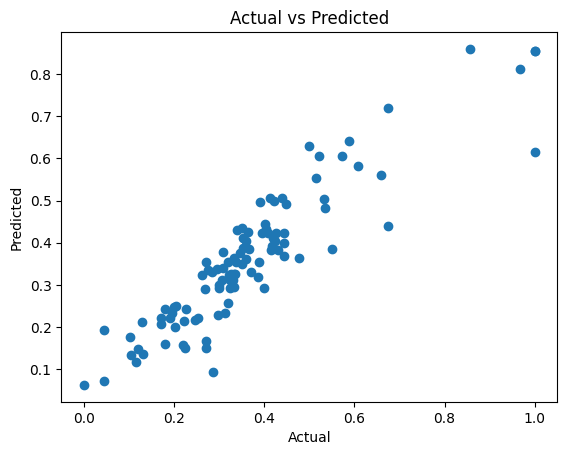

In [164]:
plt.scatter(y_test,preds)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [165]:
# checking for various k values and creating a table to summarize
r_scores = {'euclidean':[],'manhattan':[],'cosine' :[]}
for i in range(1,21):
  for metric in r_scores.keys():
    knn = KNN(k=i,distance_metric=metric)
    knn.fit_knn(X_train,y_train)
    preds = knn.predict_KNN(X_test)
    r_score = r2_score(y_test,preds)
    r_scores[metric].append(r_score)
    print(f"R score for k = {i} and metric = {metric} is {r_score}")


R score for k = 1 and metric = euclidean is 0.8461947937091924
R score for k = 1 and metric = manhattan is 0.8268433081332152
R score for k = 1 and metric = cosine is 0.8575850981725655
R score for k = 2 and metric = euclidean is 0.8349375098202448
R score for k = 2 and metric = manhattan is 0.8641525712566406
R score for k = 2 and metric = cosine is 0.8381564071878137
R score for k = 3 and metric = euclidean is 0.820451190479748
R score for k = 3 and metric = manhattan is 0.8603662754087122
R score for k = 3 and metric = cosine is 0.837741042831323
R score for k = 4 and metric = euclidean is 0.8495350138619785
R score for k = 4 and metric = manhattan is 0.8574320242452114
R score for k = 4 and metric = cosine is 0.8550206921111997
R score for k = 5 and metric = euclidean is 0.8306534451896253
R score for k = 5 and metric = manhattan is 0.8427008044461507
R score for k = 5 and metric = cosine is 0.835963305667046
R score for k = 6 and metric = euclidean is 0.8394535620355759
R score fo

In [166]:
r_scores = pd.DataFrame.from_dict(r_scores)
r_scores

,euclidean,manhattan,cosine
0,0.846195,0.826843,0.857585
1,0.834938,0.864153,0.838156
2,0.820451,0.860366,0.837741
3,0.849535,0.857432,0.855021
4,0.830653,0.842701,0.835963
5,0.839454,0.855005,0.841040
6,0.824670,0.866150,0.819704
7,0.804714,0.853273,0.805963
8,0.801714,0.842207,0.790397
9,0.786333,0.829171,0.779511


In [167]:
# best score is with manhattan with k = 6

In [168]:
best_n_value = r_scores.max(axis = 1)
best_n_value = best_n_value.idxmax() + 1
best_n_value

7

In [169]:
#finding which metric has best score
best_metric = r_scores.max()
best_metric = best_metric.idxmax()
best_metric

'manhattan'

<Axes: >

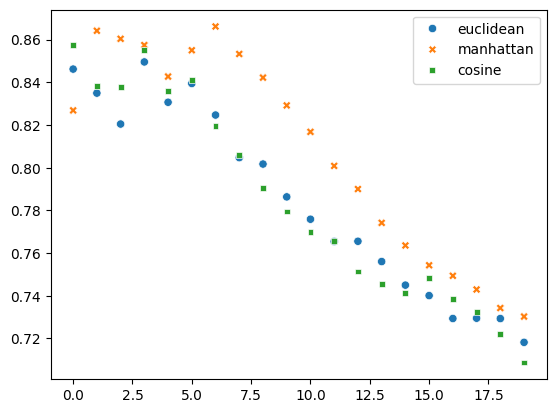

In [170]:
sns.scatterplot(r_scores)

### Task 4: Compare with scikit-learn Simple KNN [3 Marks]
1. Identify the (k, distance metric) combination that gave the best R² score from your custom implementation.
2. Use scikit-learn’s KNeighborsRegressor with algorithm='brute', weights='uniform', and the same (k, distance metric) to train and test on the dataset.
3. Compare the R² score of the scikit-learn model with your custom implementation for that best configuration

In [171]:

from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=best_n_value,algorithm='brute',weights='uniform',metric = best_metric)
knn.fit(X_train,y_train)
preds = knn.predict(X_test)
r_score = r2_score(y_test,preds)
print(f"R score for k = {best_n_value} & metric = {best_metric} is {r_score}")
print(f"while score with our implementation was {r_scores[best_metric].iloc[best_n_value-1]}")

R score for k = 7 & metric = manhattan is 0.8661499261335266
while score with our implementation was 0.8661499261335266


### Task 5: Implement Weighted KNN Regressor from Scratch [3 Marks]
1. Implement a weighted average KNN regressor from scratch, where weights are the inverse of the distance to neighbors.
  
2. Support the following distance metrics:

  2.1. Euclidean distance

  2.2. Manhattan distance

  2.3. Cosine distance

3. For different values of k (e.g., 3, 5, 7, 9, 11), predict test set targets and compute R² scores for each combination of k and distance metric.
4. Create a table summarizing the R² scores for each (k, distance metric) pair.

In [189]:
class weighted_KNN():
  def __init__(self,k=5,distance_metric = 'euclidean'):
    self.k = k
    self.distance_metric = distance_metric
  def fit_knn(self,X_train,y_train):
    self.X_train = X_train
    self.y_train = y_train
  def compute_distance(self,x):
    if self.distance_metric == 'euclidean':
      distances = Euclidean_dist(self.X_train,x)
    elif self.distance_metric == 'cosine':
      distances = Cosine_dist(self.X_train,x)
    elif self.distance_metric == 'manhattan':
      distances = Manhattan_dist(self.X_train,x)
    return distances
  def predict_KNN(self,X_test):
    preds = []
    for x in X_test:
      distances = self.compute_distance(x)
      indices = np.argsort(distances)[:self.k]
      # Get the labels and distances of the k nearest neighbors
      k_nearest_labels = self.y_train[indices]
      k_nearest_distances = distances[indices]

      inverse_distances = 1 / (k_nearest_distances + 1e-8)
      weighted_avg = np.sum(k_nearest_labels * inverse_distances.reshape(-1, 1)) / np.sum(inverse_distances)

      preds.append(weighted_avg)
    return preds

In [190]:
r2_scores_weighted = {'euclidean' : [],'manhattan' : [],'cosine' : []}
for metric in r2_scores_weighted:
  for n in range(1,21):
    weighted_knn = weighted_KNN(k=n,distance_metric=metric)
    weighted_knn.fit_knn(X_train,y_train)
    preds = weighted_knn.predict_KNN(X_test)
    weighted_knn = weighted_KNN(k=n,distance_metric=metric)
    weighted_knn.fit_knn(X_train,y_train)
    preds = weighted_knn.predict_KNN(X_test)
    r_score = r2_score(y_test,preds)
    r2_scores_weighted[metric].append(r_score)


In [191]:
r2_scores_weighted = pd.DataFrame.from_dict(r2_scores_weighted)
r2_scores_weighted


,euclidean,manhattan,cosine
0,0.846195,0.826843,0.857585
1,0.846996,0.868200,0.854871
2,0.837541,0.868415,0.859586
3,0.860066,0.867831,0.870403
4,0.846948,0.858783,0.864236
5,0.853728,0.868463,0.868073
6,0.843322,0.876557,0.857845
7,0.829796,0.867086,0.852593
8,0.827888,0.860131,0.845163
9,0.816032,0.850857,0.839575


In [192]:
best_metric_weighted = r2_scores_weighted.max()
best_metric_weighted = best_metric_weighted.idxmax()
best_metric_weighted

'manhattan'

In [193]:
best_n_value_weighted = r2_scores_weighted.max(axis = 1)
best_n_value_weighted = best_n_value_weighted.idxmax() + 1
best_n_value_weighted

7

### Task 6: Compare with scikit-learn Weighted KNN [2 Marks]
1. Identify the best (k, distance metric) combination from your weighted KNN results.

2. Use scikit-learn’s KNeighborsRegressor with algorithm='brute' and weights='distance' for the same (k, distance metric).

In [194]:
knn = KNeighborsRegressor(n_neighbors=best_n_value_weighted,algorithm='brute',weights='distance',metric = best_metric_weighted)
knn.fit(X_train,y_train)
preds = knn.predict(X_test)
r_score = r2_score(y_test,preds)
print(f"R score for k = {best_n_value_weighted} & metric = {best_metric_weighted} is {r_score}")
print(f"while score with our implementation was {r2_scores_weighted[best_metric_weighted].iloc[best_n_value_weighted-1]}")

R score for k = 7 & metric = manhattan is 0.8765569598053313
while score with our implementation was 0.8765569596574154


### Task 7: Reporting and Visualization [3 Marks]
1. Plot the R² scores for both simple and weighted KNN from your implementation across different k and distance metrics (heatmap or line plots).

2. Plot corresponding R² scores from scikit-learn for the same parameters.

3. Compare the R² scores of scikit-learn weighted KNN with your custom weighted KNN for the best combination.

4. Plotting the Scatter Plots of the actual and predicted datapoints

<Axes: >

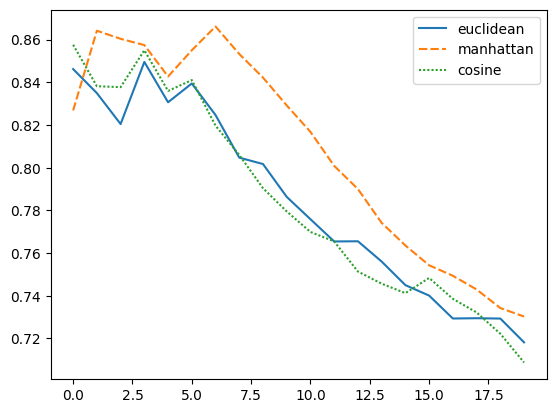

In [195]:
#ploting both the r2_scores (named r_scores in this implementation) and r2_scores weighted
sns.lineplot(r_scores)


<Axes: >

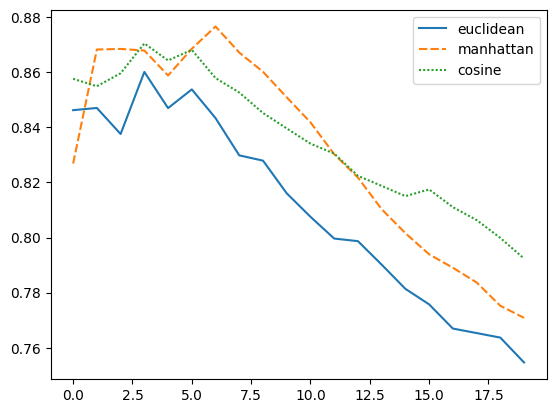

In [196]:
sns.lineplot(r2_scores_weighted)

In [197]:
#getting values for different k and distance metrics for scikit learn implementations
r2_scores_library = {'euclidean' : [],'manhattan' : [],'cosine' : []}
r2_scores_weighted_library = {'euclidean' : [],'manhattan' : [],'cosine' : []}
for metric in r2_scores_library.keys():
  for n in range(1,21):
    knn = KNeighborsRegressor(n_neighbors=n,algorithm='brute',weights='uniform',metric = metric)
    knn.fit(X_train,y_train)
    preds = knn.predict(X_test)
    r_score = r2_score(y_test,preds)
    r2_scores_library[metric].append(r_score)
    weighted_knn = KNeighborsRegressor(n_neighbors=n,algorithm='brute',weights='distance',metric = metric)
    weighted_knn.fit(X_train,y_train)
    preds = weighted_knn.predict(X_test)
    r_score = r2_score(y_test,preds)
    r2_scores_weighted_library[metric].append(r_score)
r2_scores_library = pd.DataFrame.from_dict(r2_scores_library)
r2_scores_weighted_library = pd.DataFrame.from_dict(r2_scores_weighted_library)


In [198]:
r2_scores_library

,euclidean,manhattan,cosine
0,0.846195,0.826843,0.857585
1,0.834938,0.864153,0.838156
2,0.820451,0.860366,0.837741
3,0.849535,0.857432,0.855021
4,0.830653,0.842701,0.835963
5,0.839454,0.855005,0.841040
6,0.824670,0.866150,0.819704
7,0.804714,0.853273,0.805963
8,0.801714,0.842207,0.790397
9,0.786333,0.829171,0.779511


In [199]:
r2_scores_weighted_library

,euclidean,manhattan,cosine
0,0.846195,0.826843,0.857585
1,0.846996,0.868200,0.854871
2,0.837541,0.868415,0.859586
3,0.860066,0.867831,0.870403
4,0.846948,0.858783,0.864236
5,0.853728,0.868463,0.868073
6,0.843322,0.876557,0.857845
7,0.829796,0.867086,0.852593
8,0.827888,0.860131,0.845163
9,0.816032,0.850857,0.839575


<Axes: >

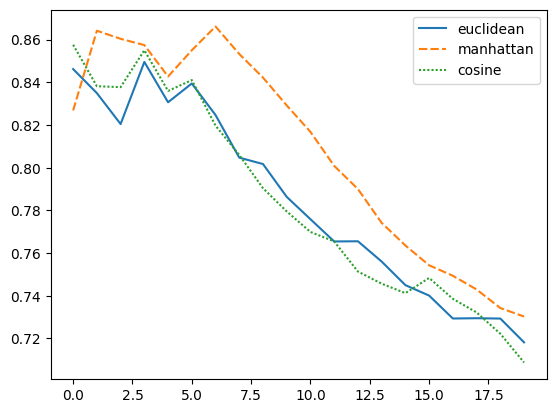

In [200]:
sns.lineplot(r2_scores_library)

<Axes: >

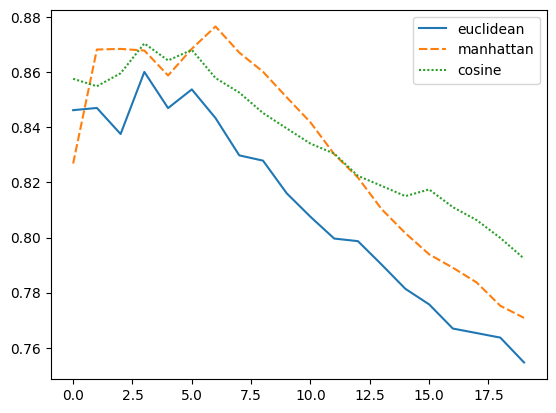

In [201]:
sns.lineplot(r2_scores_weighted_library)

### Task 8: Summarize your findings: [1 Mark]

- Which (k, distance metric) performed best?

- How does your implementation compare with scikit-learn?

- Discuss any observations regarding distance metrics or weighting.

In [202]:
print(f"The best performing K : {best_n_value} & metric : {best_metric} for uniform knn, corresponding r2_score was {r_scores[best_metric].iloc[best_n_value-1]}")
print(f"The best performing K : {best_n_value_weighted} & metric : {best_metric_weighted} for weighted knn, corresponding r2_score was {r2_scores_weighted[best_metric_weighted].iloc[best_n_value_weighted-1]}")

The best performing K : 7 & metric : manhattan for uniform knn, corresponding r2_score was 0.8661499261335266
The best performing K : 7 & metric : manhattan for weighted knn, corresponding r2_score was 0.8765569596574154


In [215]:
if (r_scores == r2_scores_library).sum().sum() == r_scores.size and (r2_scores_weighted.round(3)== r2_scores_weighted_library.round(3)).sum().sum() == r2_scores_weighted_library.size:
  print("Our implementation and library implementation are same")
else:
  print("Our implementation and library implementation are not same")
#we rounded weighted knn values upto three digits after decimal to compensate rounding errors and constant differences for edge cases

Our implementation and library implementation are same


In [217]:
# Both weighted and uniform knn r2 scores increase till a certain value of k and then the r2 scores start to drop for any metric


In [222]:
(r_scores >= r2_scores_weighted).sum().sum()

np.int64(0)

In [223]:
# the above expression shows r2 score for all weighted values is larger than uniform weighted knn except for k =1 where both are actually uniform knns only

In [224]:
# manhattan metric performs best regardless of uniform or weighted

In [225]:
# cosine metric is similar to euclidean metric for uniform but takes the lead in case of weighted version, and is even better than manhattan metric for weighted version for higher values of k